## Load the data from the CSV file and show the average length of a chronicle

In [1]:
import pandas as pd

df = pd.read_csv("expressen-kronikor.csv")
df_stop = pd.read_csv("updated-with-stopwords-expressen-kronikor.csv")

lengths = []
lengths_stop = []

for idx, row in df.iterrows():
    lengths.append(len(row['content']))
for idx, row in df_stop.iterrows():
    lengths_stop.append(len(row['content']))

print("The average chronicle length without stop-words are: ", sum(lengths)/len(lengths))

print("The average chronicle length with stop-words are: ", sum(lengths_stop)/len(lengths_stop))

The average chronicle length without stop-words are:  2883.340546697039
The average chronicle length with stop-words are:  3761.318493150685


In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE

# Take authors that occur more than 30 times
df = df[df['author'].map(df['author'].value_counts()) > 10]
df = df[df['author'] != 'Amina Manzoor']

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_valid_index in split.split(df, df.author):
    df_train = df.iloc[train_index]
    df_test = df.iloc[test_valid_index]

author_names = df["author"].unique()
labels = {}
index = 0
for author in author_names:
  labels[author] = index
  index += 1

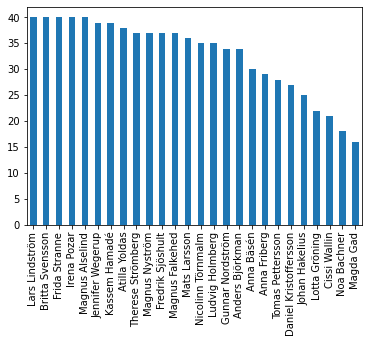

In [8]:
df["author"].value_counts().plot(kind='bar').get_figure().savefig('stats_chronicles.pdf', bbox_inches='tight')

# Functions to display classification report and confusion matrix

In [4]:
import pyperclip

def classification2latex(report):
    lines = report.splitlines()
    classes = [line.split() for line in lines[2:-4]]
    avg = [line.split() for line in lines[-3:]]
    result = r"\begin{tabular}{c | c c c r}" + "\n" + "Class & Precision & Recall & F-score & Support" + r'\\' + "\n" + "\midrule" + "\n" 
    for line in classes:
        result += line[0] + " " + line[1] + " & " + line[2] + " & " + line[3] + " & " + line[4] + " & " + line[5] + r'\\' + "\n"
    result += "\midrule \n"
    for line in avg:
        if line[0] == "accuracy":
            result += line[0] + " & & & " + line[1] + " & " + line[2] + r'\\' + "\n"
        else:
            result += line[0] + " " + line[1] + " & " + line[2] + " & " + line[3] + " & " + line[4] + " & " + line[5] + r'\\' + "\n"
    result += "\end{tabular}"
    pyperclip.copy(result)
    return result

In [28]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          file_name="cm.png",
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(12, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig(file_name, format="pdf", bbox_inches="tight")
    plt.show()

## Baseline with unbalanced dataset

C:\Users\Hannes\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hannes\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hannes\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

                       precision    recall  f1-score   support

      Anders Björkman       0.00      0.00      0.00         3
           Anna Bäsén       0.00      0.00      0.00         3
         Anna Friberg       0.00      0.00      0.00         3
        Atilla Yoldas       0.00      0.00      0.00         4
      Britta Svensson       0.00      0.00      0.00         4
         Cissi Wallin       0.00      0.00      0.00         2
Daniel Kristoffersson       0.00      0.00      0.00         3
     Fredrik Sjöshult       0.00      0.00      0.00         4
        Frida Stranne       0.00      0.00      0.00         4
     Gunnar Nordström       0.25      0.33      0.29         3
          Irena Pozar       0.00      0.00      0.00         4
     Jennifer Wegerup       0.00      0.00      0.00         4
       Johan Hakelius       0.00      0.00      0.00         2
        Kassem Hamadé       0.00      0.00      0.00         4
       Lars Lindström       0.00      0.00      0.00  

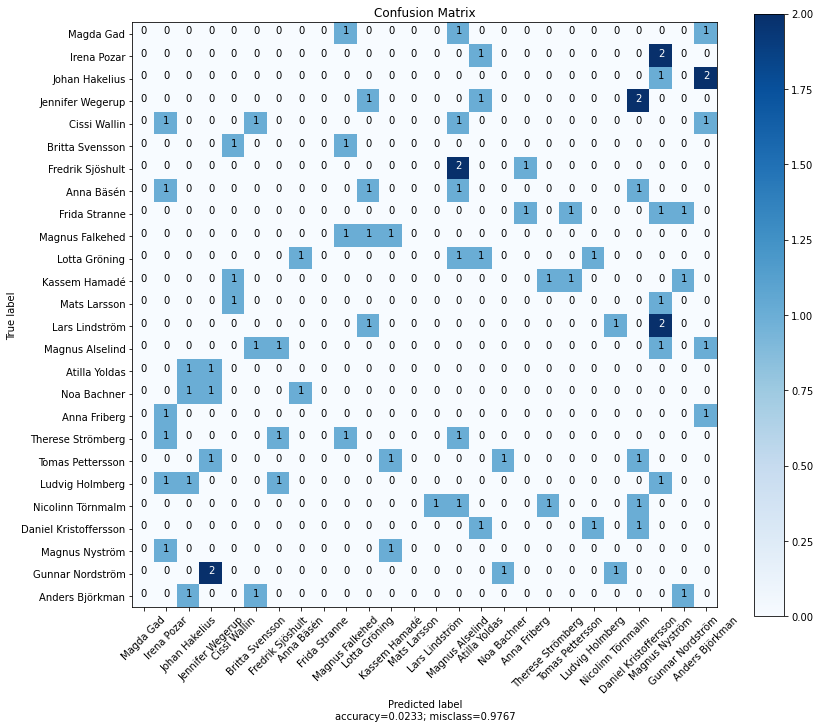

In [29]:
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.pipeline import Pipeline
authors = sorted(df_train['author'].unique())

pipe = Pipeline([('count', CountVectorizer()), ('tfidf', TfidfTransformer(use_idf=True)), ('sampling', SMOTE(random_state=42)),
  ('Dummy Classifier', DummyClassifier(strategy="stratified"))])
pipe.fit(df_train["content"], df_train["author"])
predicted = pipe.predict(df_test["content"])
report = classification_report(df_test["author"], predicted, target_names=authors)
print(report)
classification2latex(report)
cm = confusion_matrix(df_test["author"], predicted)
plot_confusion_matrix(cm, labels, normalize=False, title='Confusion Matrix', file_name='stratified-confusion.pdf')

C:\Users\Hannes\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hannes\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hannes\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

                       precision    recall  f1-score   support

      Anders Björkman       0.03      1.00      0.07         3
           Anna Bäsén       0.00      0.00      0.00         3
         Anna Friberg       0.00      0.00      0.00         3
        Atilla Yoldas       0.00      0.00      0.00         4
      Britta Svensson       0.00      0.00      0.00         4
         Cissi Wallin       0.00      0.00      0.00         2
Daniel Kristoffersson       0.00      0.00      0.00         3
     Fredrik Sjöshult       0.00      0.00      0.00         4
        Frida Stranne       0.00      0.00      0.00         4
     Gunnar Nordström       0.00      0.00      0.00         3
          Irena Pozar       0.00      0.00      0.00         4
     Jennifer Wegerup       0.00      0.00      0.00         4
       Johan Hakelius       0.00      0.00      0.00         2
        Kassem Hamadé       0.00      0.00      0.00         4
       Lars Lindström       0.00      0.00      0.00  

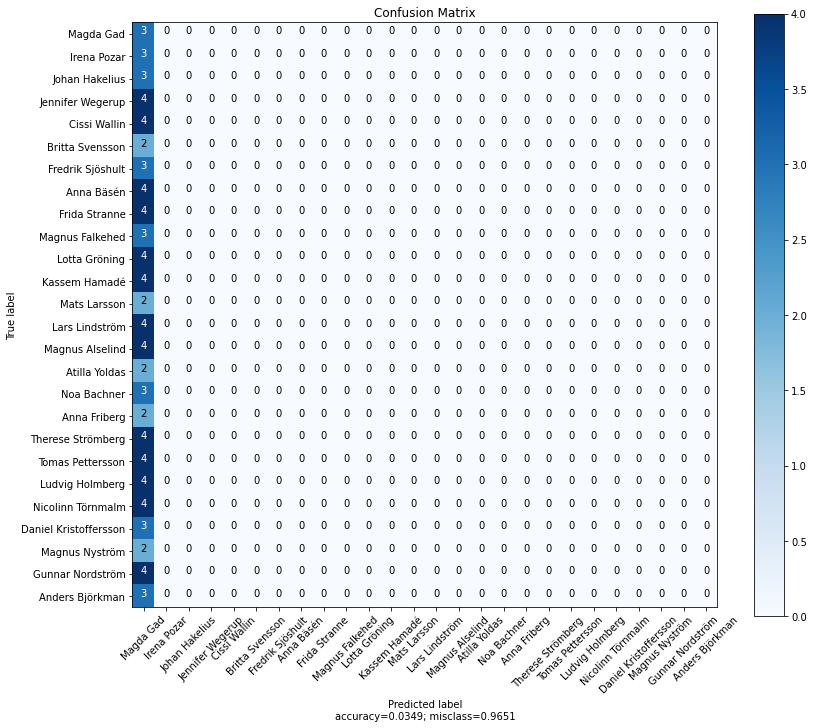

In [30]:
pipe = Pipeline([('count', CountVectorizer()), ('tfidf', TfidfTransformer(use_idf=True)), ('sampling', SMOTE(random_state=42)),
  ('Dummy Classifier', DummyClassifier(strategy="most_frequent"))])
pipe.fit(df_train["content"], df_train["author"])
predicted = pipe.predict(df_test["content"])
report = classification_report(df_test["author"], predicted, target_names=authors)
print(report)
classification2latex(report)
cm = confusion_matrix(df_test["author"], predicted)
plot_confusion_matrix(cm, labels, normalize=False, title='Confusion Matrix', file_name='most-frequent-confusion.pdf')

## Multinomial Naive Bayes

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer


pipe = Pipeline([('count', CountVectorizer()), ('tfidf', TfidfTransformer(use_idf=True)), ('sampling', SMOTE(random_state=42)),
  ('Multinomial Naive Bayes', MultinomialNB())])
pipe.fit(df_train["content"], df_train["author"])
predicted = pipe.predict(df_test["content"])
print(classification_report(df_test["author"], predicted, target_names=authors))

                       precision    recall  f1-score   support

      Anders Björkman       1.00      0.67      0.80         3
           Anna Bäsén       0.75      1.00      0.86         3
         Anna Friberg       0.67      0.67      0.67         3
        Atilla Yoldas       0.80      1.00      0.89         4
      Britta Svensson       1.00      0.25      0.40         4
         Cissi Wallin       1.00      0.50      0.67         2
Daniel Kristoffersson       1.00      1.00      1.00         3
     Fredrik Sjöshult       1.00      1.00      1.00         4
        Frida Stranne       0.31      1.00      0.47         4
     Gunnar Nordström       1.00      1.00      1.00         3
          Irena Pozar       0.25      0.25      0.25         4
     Jennifer Wegerup       0.75      0.75      0.75         4
       Johan Hakelius       1.00      0.50      0.67         2
        Kassem Hamadé       1.00      0.75      0.86         4
       Lars Lindström       1.00      0.50      0.67  

## Multinomial Naive Bayes - Finding the best pipeline (trimming hyperparameters)

In [32]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'count__binary': [True, False],
    'count__ngram_range': [(1,1), (1,2)],
    'multiNB__alpha': [1, 0.1]
}
pipe = Pipeline([('count', CountVectorizer()), ('tfidf', TfidfTransformer(use_idf=True)), ('sampling', SMOTE(random_state=42)),
    ('multiNB', MultinomialNB())])
clf = GridSearchCV(pipe, param_grid=parameters)
clf.fit(df_train["content"], df_train["author"])

GridSearchCV(estimator=Pipeline(steps=[('count', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('sampling', SMOTE(random_state=42)),
                                       ('multiNB', MultinomialNB())]),
             param_grid={'count__binary': [True, False],
                         'count__ngram_range': [(1, 1), (1, 2)],
                         'multiNB__alpha': [1, 0.1]})

{'count__binary': True, 'count__ngram_range': (1, 2), 'multiNB__alpha': 0.1}
                       precision    recall  f1-score   support

      Anders Björkman       1.00      1.00      1.00         3
           Anna Bäsén       0.75      1.00      0.86         3
         Anna Friberg       1.00      0.67      0.80         3
        Atilla Yoldas       1.00      0.75      0.86         4
      Britta Svensson       0.75      0.75      0.75         4
         Cissi Wallin       1.00      1.00      1.00         2
Daniel Kristoffersson       1.00      1.00      1.00         3
     Fredrik Sjöshult       1.00      1.00      1.00         4
        Frida Stranne       0.44      1.00      0.62         4
     Gunnar Nordström       1.00      1.00      1.00         3
          Irena Pozar       0.50      0.50      0.50         4
     Jennifer Wegerup       1.00      1.00      1.00         4
       Johan Hakelius       1.00      0.50      0.67         2
        Kassem Hamadé       1.00      1.

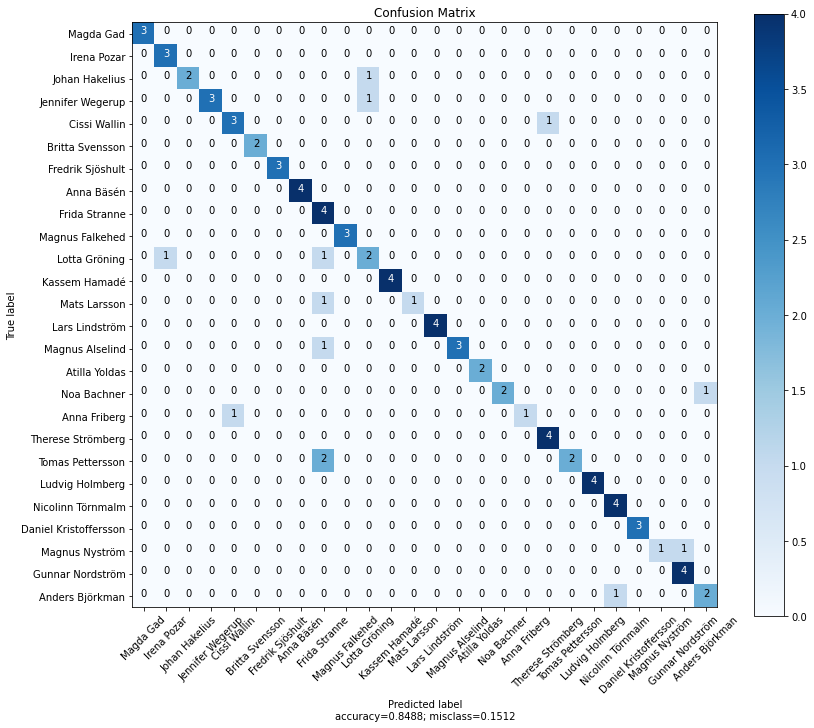

In [33]:
print(clf.best_params_)

pipe_best = clf.best_estimator_
predicted = pipe_best.predict(df_test["content"])
report = classification_report(df_test["author"], predicted, target_names=authors)
print(report)
classification2latex(report)
cm = confusion_matrix(df_test["author"], predicted)
plot_confusion_matrix(cm, labels, normalize=False, title='Confusion Matrix', file_name='multiNB-confusion.pdf')

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('count', CountVectorizer()), ('tfidf', TfidfTransformer(use_idf=True)), ('sampling', SMOTE(random_state=42)),
('logisticregression', LogisticRegression())])


pipe.fit(df_train["content"], df_train["author"])
predicted = pipe.predict(df_test["content"])
print(classification_report(df_test["author"], predicted, target_names=authors))

                       precision    recall  f1-score   support

      Anders Björkman       1.00      1.00      1.00         3
           Anna Bäsén       1.00      1.00      1.00         3
         Anna Friberg       1.00      0.67      0.80         3
        Atilla Yoldas       0.80      1.00      0.89         4
      Britta Svensson       1.00      0.25      0.40         4
         Cissi Wallin       1.00      0.50      0.67         2
Daniel Kristoffersson       0.75      1.00      0.86         3
     Fredrik Sjöshult       1.00      1.00      1.00         4
        Frida Stranne       0.67      1.00      0.80         4
     Gunnar Nordström       1.00      1.00      1.00         3
          Irena Pozar       0.40      0.50      0.44         4
     Jennifer Wegerup       0.60      0.75      0.67         4
       Johan Hakelius       1.00      1.00      1.00         2
        Kassem Hamadé       1.00      1.00      1.00         4
       Lars Lindström       0.80      1.00      0.89  

# Logistic Regression, finding the optimal parameters with GridSearchCV

In [35]:
import numpy as np

pipe = Pipeline([('count', CountVectorizer()), ('tfidf', TfidfTransformer(use_idf=True)), ('sampling', SMOTE(random_state=42)),
('logisticregression', LogisticRegression())])

parameters = {
    'count__binary': [True, False],
    'count__ngram_range': [(1,1), (1,2)],
    'logisticregression__penalty':["l1","l2"],
    'logisticregression__C':np.logspace(-3,3,7)}

clf = GridSearchCV(pipe, param_grid=parameters, n_jobs=-1)
clf.fit(df_train["content"], df_train["author"])

C:\Users\Hannes\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.7955267         nan 0.8424582         nan 0.84766149
        nan 0.88410152        nan 0.897114          nan 0.8997114
        nan 0.9010101         nan 0.84244971        nan 0.86457007
        nan 0.86197267        nan 0.83851965        nan 0.83070198
        nan 0.83851116        nan 0.84503013        nan 0.63670317
        nan 0.7369663         nan 0.74478397        nan 0.79159664
        nan 0.83064256        nan 0.83846872        nan 0.84105764
        nan 0.67575758        nan 0.74610814        nan 0.75131143
        nan 0.77859265        nan 0.79290383        nan 0.80202869
        nan 0.80723198]
  category=UserWarning


GridSearchCV(estimator=Pipeline(steps=[('count', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('sampling', SMOTE(random_state=42)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'count__binary': [True, False],
                         'count__ngram_range': [(1, 1), (1, 2)],
                         'logisticregression__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'logisticregression__penalty': ['l1', 'l2']})

{'count__binary': True, 'count__ngram_range': (1, 1), 'logisticregression__C': 1000.0, 'logisticregression__penalty': 'l2'}
                       precision    recall  f1-score   support

      Anders Björkman       1.00      1.00      1.00         3
           Anna Bäsén       1.00      1.00      1.00         3
         Anna Friberg       1.00      0.67      0.80         3
        Atilla Yoldas       1.00      0.75      0.86         4
      Britta Svensson       0.80      1.00      0.89         4
         Cissi Wallin       1.00      0.50      0.67         2
Daniel Kristoffersson       1.00      1.00      1.00         3
     Fredrik Sjöshult       1.00      1.00      1.00         4
        Frida Stranne       1.00      1.00      1.00         4
     Gunnar Nordström       1.00      1.00      1.00         3
          Irena Pozar       0.60      0.75      0.67         4
     Jennifer Wegerup       0.80      1.00      0.89         4
       Johan Hakelius       1.00      1.00      1.00    

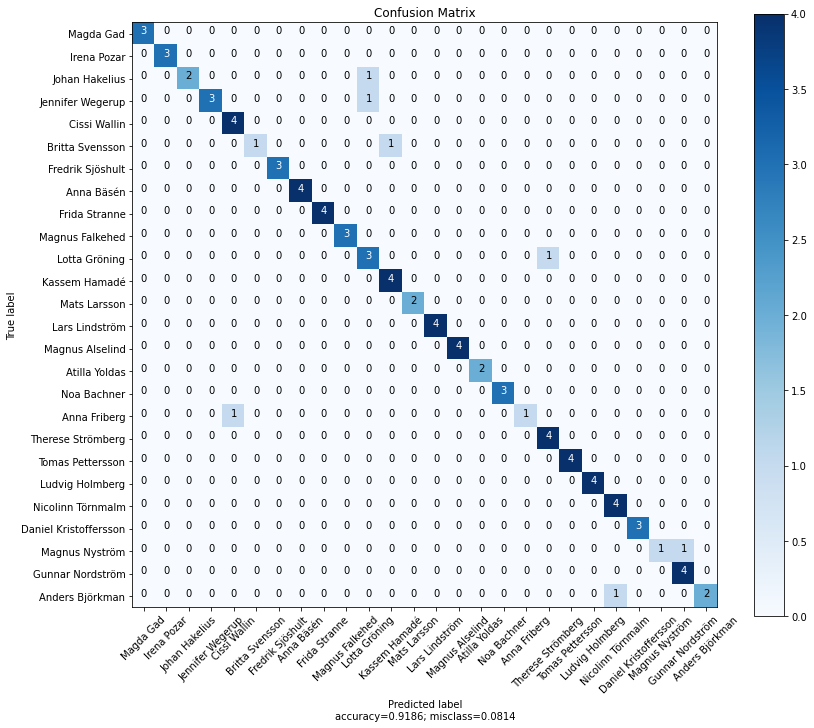

In [36]:
print(clf.best_params_)

pipe_best = clf.best_estimator_
predicted = pipe_best.predict(df_test["content"])
report = classification_report(df_test["author"], predicted, target_names=authors)
print(report)
classification2latex(report)
cm = confusion_matrix(df_test["author"], predicted)
plot_confusion_matrix(cm, labels, normalize=False, title='Confusion Matrix', file_name='multiLog-confusion.pdf')

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('count', CountVectorizer()), ('tfidf', TfidfTransformer(use_idf=True)), ('sampling', SMOTE(random_state=42)),
('randomforest', RandomForestClassifier())])


pipe.fit(df_train["content"], df_train["author"])
predicted = pipe.predict(df_test["content"])
print(classification_report(df_test["author"], predicted, target_names=authors))

                       precision    recall  f1-score   support

      Anders Björkman       0.75      1.00      0.86         3
           Anna Bäsén       1.00      1.00      1.00         3
         Anna Friberg       0.67      0.67      0.67         3
        Atilla Yoldas       0.67      0.50      0.57         4
      Britta Svensson       1.00      0.25      0.40         4
         Cissi Wallin       1.00      0.50      0.67         2
Daniel Kristoffersson       0.75      1.00      0.86         3
     Fredrik Sjöshult       0.50      1.00      0.67         4
        Frida Stranne       0.67      1.00      0.80         4
     Gunnar Nordström       0.67      0.67      0.67         3
          Irena Pozar       0.50      0.50      0.50         4
     Jennifer Wegerup       0.60      0.75      0.67         4
       Johan Hakelius       0.00      0.00      0.00         2
        Kassem Hamadé       0.80      1.00      0.89         4
       Lars Lindström       0.67      0.50      0.57  

C:\Users\Hannes\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hannes\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hannes\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# Random Forest, finding the optimal parameters with GridSearchCV

In [38]:
pipe = Pipeline([('count', CountVectorizer()), ('tfidf', TfidfTransformer(use_idf=True)), ('sampling', SMOTE(random_state=42)),
('randomforest', RandomForestClassifier())])

parameters = {
    'count__binary': [True, False],
    'count__ngram_range': [(1,1), (1,2)],
    'randomforest__max_features': ['auto', 'sqrt', 'log2'],
    'randomforest__min_samples_leaf': [1, 2, 4],
    'randomforest__min_samples_split': [2, 5, 10],
    'randomforest__bootstrap': [True, False],
    'randomforest__max_depth' : [10, 100, None]}

clf = GridSearchCV(pipe, param_grid=parameters, n_jobs=-1)
clf.fit(df_train["content"], df_train["author"])

GridSearchCV(estimator=Pipeline(steps=[('count', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('sampling', SMOTE(random_state=42)),
                                       ('randomforest',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'count__binary': [True, False],
                         'count__ngram_range': [(1, 1), (1, 2)],
                         'randomforest__bootstrap': [True, False],
                         'randomforest__max_depth': [10, 100, None],
                         'randomforest__max_features': ['auto', 'sqrt', 'log2'],
                         'randomforest__min_samples_leaf': [1, 2, 4],
                         'randomforest__min_samples_split': [2, 5, 10]})

{'count__binary': False, 'count__ngram_range': (1, 1), 'randomforest__bootstrap': False, 'randomforest__max_depth': None, 'randomforest__max_features': 'auto', 'randomforest__min_samples_leaf': 2, 'randomforest__min_samples_split': 2}
                       precision    recall  f1-score   support

      Anders Björkman       1.00      1.00      1.00         3
           Anna Bäsén       1.00      1.00      1.00         3
         Anna Friberg       1.00      0.67      0.80         3
        Atilla Yoldas       1.00      0.50      0.67         4
      Britta Svensson       1.00      0.50      0.67         4
         Cissi Wallin       1.00      0.50      0.67         2
Daniel Kristoffersson       0.75      1.00      0.86         3
     Fredrik Sjöshult       0.57      1.00      0.73         4
        Frida Stranne       1.00      1.00      1.00         4
     Gunnar Nordström       1.00      1.00      1.00         3
          Irena Pozar       0.80      1.00      0.89         4
     Jen

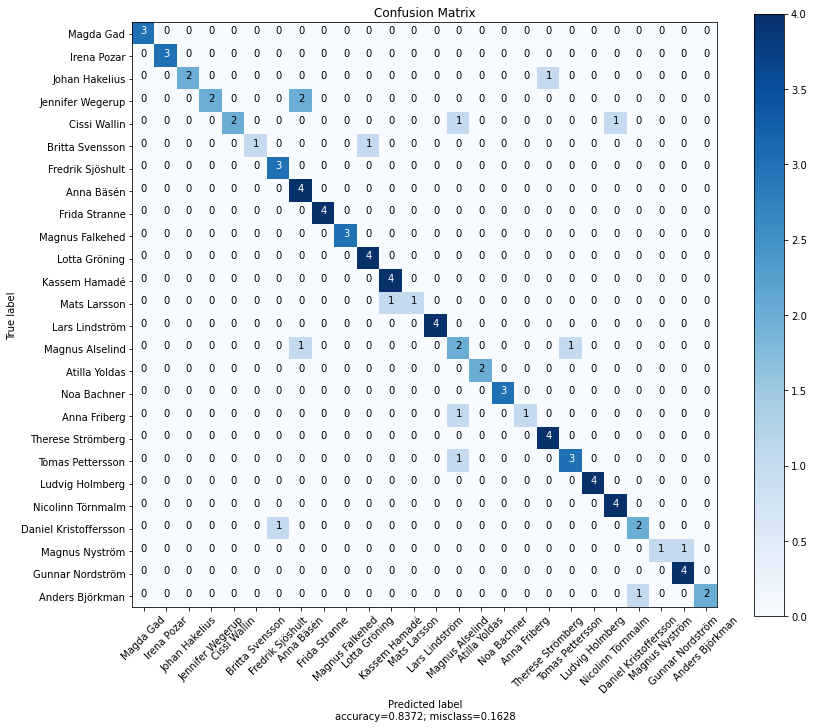

In [40]:
print(clf.best_params_)

pipe_best = clf.best_estimator_
predicted = pipe_best.predict(df_test["content"])
report = classification_report(df_test["author"], predicted, target_names=authors)
print(report)
classification2latex(report)
cm = confusion_matrix(df_test["author"], predicted)
plot_confusion_matrix(cm, labels, normalize=False, title='Confusion Matrix', file_name='randomforest-confusion.pdf')